# Main Dashboard of PhD experiments in post silicon (TSNE)

In [1]:
%matplotlib inline

import os
from pca.analytics import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

          test_name  branch_misses  cache_misses  l1_dcache_load_misses
0      603.bwaves_s           0.17        97.189                   5.12
1         605.mcf_s           8.06        34.708                  25.38
2   607.cactuBSSN_s           0.18        76.999                  23.74
3         619.lbm_s           2.40        92.981                  31.63
4     620.omnetpp_s           2.43        25.554                   8.06
5         621.wrf_s           1.62        28.177                  10.71
6   623.xalancbmk_s           0.46         2.488                  11.00
7        625.x264_s           2.03        30.098                   1.57
8        627.cam4_s           0.77        74.694                   8.67
9        628.pop2_s           0.94        49.369                  18.12
10  631.deepsjeng_s           5.00        50.009                   1.96
11    638.imagick_s           0.08        45.596                   5.09
12      641.leela_s          11.75         5.666                

/Users/vrodri3/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/vrodri3/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 1000 iterations: 0.253221


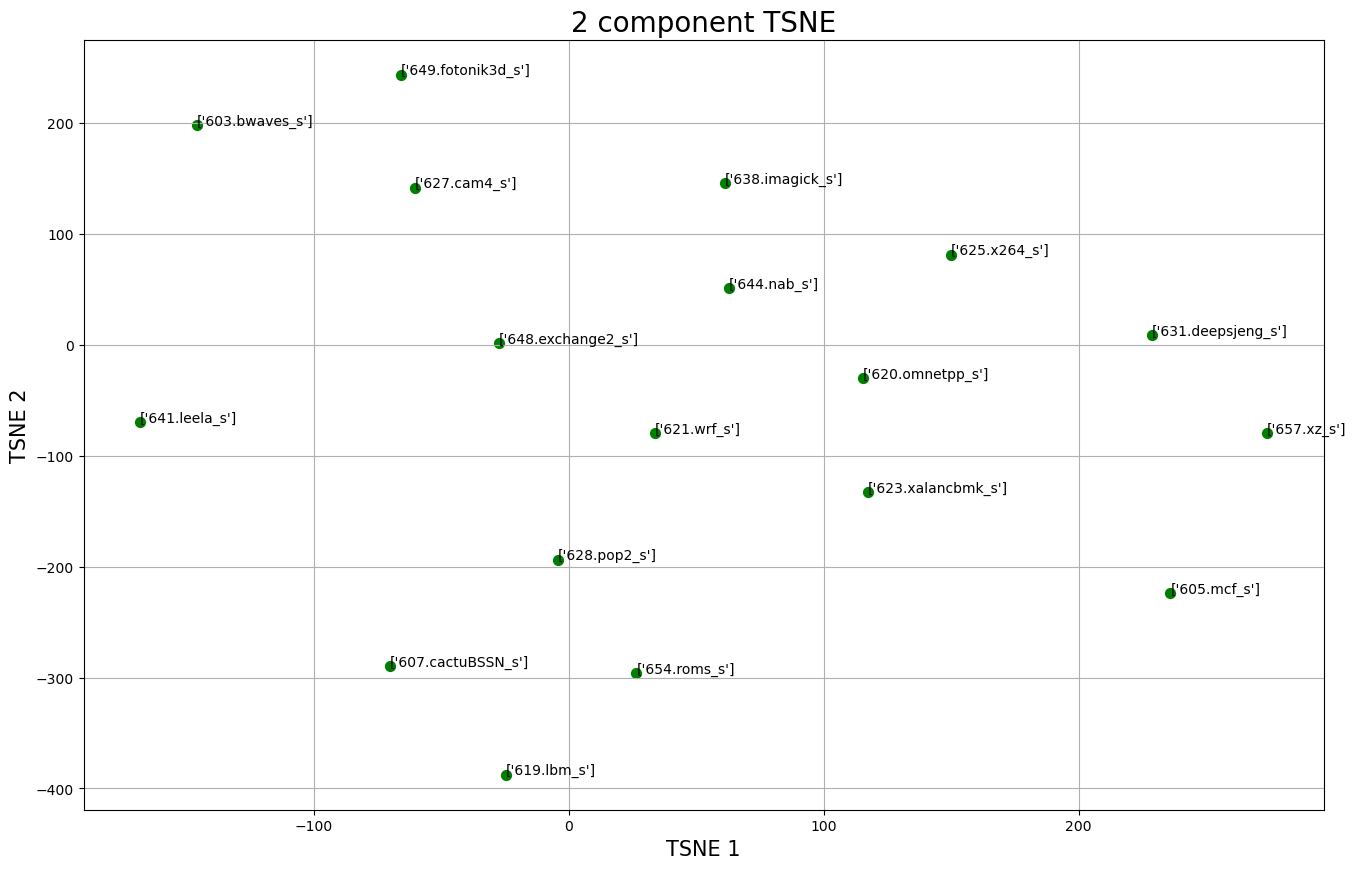

In [2]:
%matplotlib inline

filename = 'post_silicon_results/results_spec2017.csv'
pca_df = None

if os.path.exists(filename):
    df = pd.read_csv(filename)
    print(df)
    df_ = df.loc[:, df.columns != 'test_name']
    df_ = (df_-df_.min())/(df_.max()-df_.min())
    extracted_col = df["test_name"]
    df_.insert(0, 'test_name', extracted_col)
    df_.set_index('test_name')
    df_.to_csv('normalized_df.csv')
    df = df_

    features = list(df.columns)[1:]
    test_column = list(df.columns)[0]
    
    pca_df = get_TSNE(df, features, test_column)
else:
    print("Filename error")

# Plot characteristics of the worklaods

<AxesSubplot:xlabel='real_cluster'>

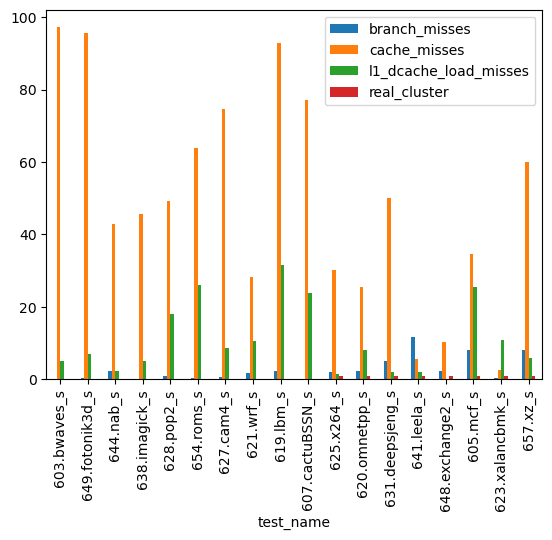

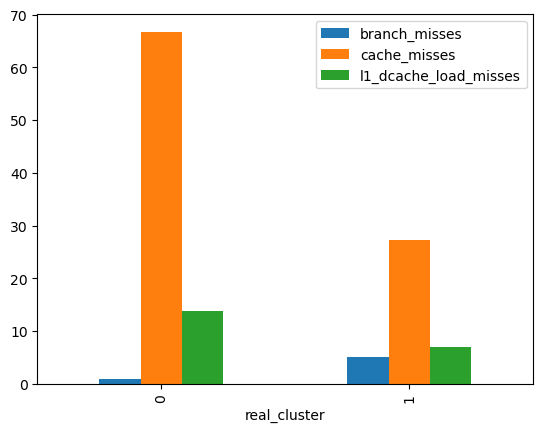

In [3]:

df = pd.read_csv("references/clusters_spec2017.csv")
df_sorted_ref = df.sort_values(by='test_name')

df = pd.read_csv(filename)
df_sorted = df.sort_values(by='test_name')
df_sorted ['real_cluster'] = df_sorted_ref['REAL'].tolist()
df_sorted_groups = (df_sorted.sort_values(by='real_cluster'))
df_sorted_groups.plot.bar(x="test_name")

df_groups_summary = df_sorted_groups.groupby(['real_cluster']).mean()
df_groups_summary.plot.bar()



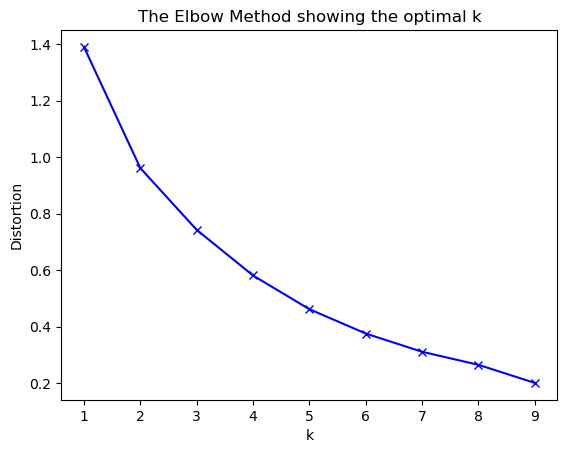

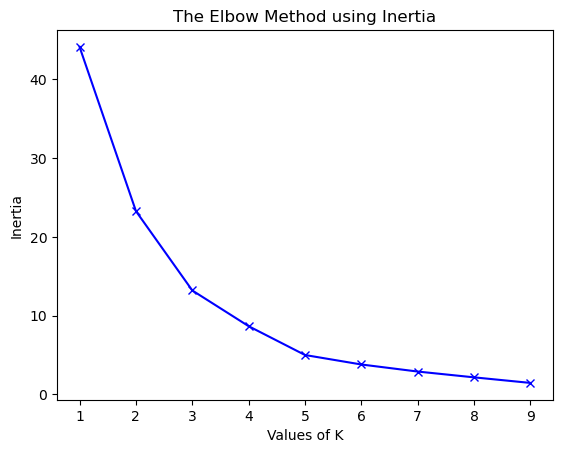

4


In [4]:
if os.path.exists("pca.csv"):    
    clusters = calculate_elbow(pd.read_csv("pca.csv"))


In [5]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 4


## Clasification based on optimal number of clusters

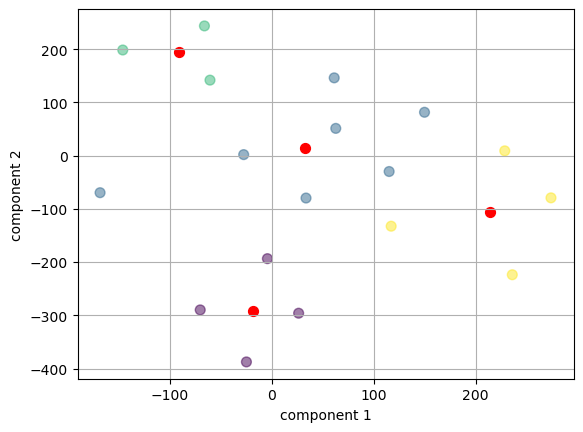

   PRED        test_name
0     0  607.cactuBSSN_s
0     0        619.lbm_s
0     0       628.pop2_s
0     0       654.roms_s
1     1    620.omnetpp_s
1     1        621.wrf_s
1     1       625.x264_s
1     1    638.imagick_s
1     1      641.leela_s
1     1        644.nab_s
1     1  648.exchange2_s
2     2     603.bwaves_s
2     2       627.cam4_s
2     2  649.fotonik3d_s
3     3        605.mcf_s
3     3  623.xalancbmk_s
3     3  631.deepsjeng_s
3     3         657.xz_s


In [7]:
df_result,_ = kmean_cluster("tsne.csv",clusters)
print(df_result)

## Clasification based on FP/INT clusters

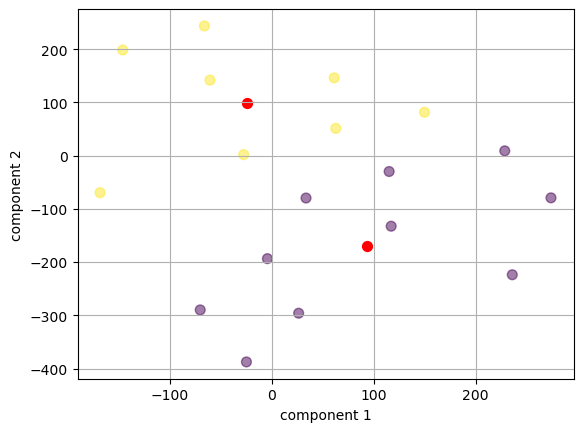

   PRED        test_name
0     0        605.mcf_s
0     0  607.cactuBSSN_s
0     0        619.lbm_s
0     0    620.omnetpp_s
0     0        621.wrf_s
0     0  623.xalancbmk_s
0     0       628.pop2_s
0     0  631.deepsjeng_s
0     0       654.roms_s
0     0         657.xz_s
1     1     603.bwaves_s
1     1       625.x264_s
1     1       627.cam4_s
1     1    638.imagick_s
1     1      641.leela_s
1     1        644.nab_s
1     1  648.exchange2_s
1     1  649.fotonik3d_s


In [11]:
df_result,kmeans = kmean_cluster("tsne.csv",2)
print(df_result)

## Automatic label of clusters based cosine similarity to FP/INT


\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}


A = PRED -> 0
cosine_similarity vs fp_tests 0.4999999999999999
cosine_similarity vs int_tests 0.5590169943749475
cosine_similarity_int > cosine_similarity_fp
Assigining 1 label to pred cluster

B = PRED -> 1
cosine_similarity vs fp_tests 0.5590169943749475
cosine_similarity vs int_tests 0.37499999999999994
cosine_similarity_fp > cosine_similarity_int
Assigining 0 label to pred cluster

             labels  val_pred  val_true
9          657.xz_s         1         1
8        654.roms_s         1         0
17  649.fotonik3d_s         0         0
16  648.exchange2_s         0         1
15        644.nab_s         0         0
14      641.leela_s         0         1
13    638.imagick_s         0         0
7   631.deepsjeng_s         1         1
6        628.pop2_s         1         0
12       627.cam4_s         0         0
11       625.x264_s         0         1
5   623.xalancbmk_s         1         1
4         621.wrf_s         1         0
3     620.omnetpp_s         1         1
2         

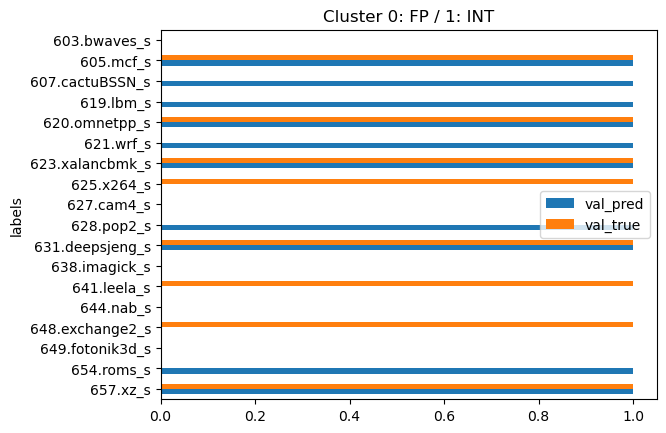

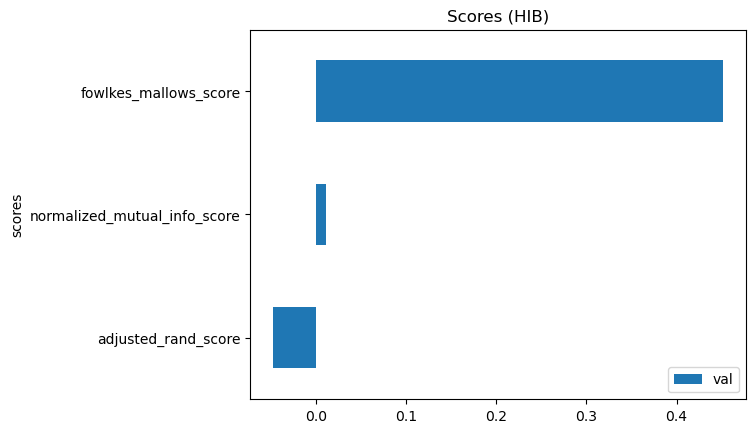

In [12]:
df = pd.read_csv("references/clusters_spec2017.csv")
df_sorted = df.sort_values(by='REAL')
fp_tests = df_sorted[df_sorted['REAL'] == 0]
int_tests = df_sorted[df_sorted['REAL'] == 1]

df = pd.read_csv("clusters.csv")
df_sorted = df.sort_values(by='PRED')
A = df_sorted[df_sorted['PRED'] == 0]
B = df_sorted[df_sorted['PRED'] == 1]

C = normalize(A,B,fp_tests,int_tests)
C_sorted =  C.sort_values(by='test_name', ascending=False)

REAL = pd.read_csv("references/clusters_spec2017.csv")
REAL_sorted = REAL.sort_values(by='test_name', ascending=False)

labels_pred = C_sorted["PRED"].tolist()
labels_pred_ = [eval(i) for i in labels_pred]
labels_pred = labels_pred_

labels_true = REAL_sorted["REAL"].tolist()

df = pd.DataFrame({'labels':C_sorted['test_name'], 'val_pred':labels_pred, 'val_true':labels_true})
print()
print(df)

print()
print(df.loc[~(df['val_pred'] == df['val_true'])])


ax = df.plot.barh(x='labels', y=['val_pred','val_true'],  rot=0, title= "Cluster 0: FP / 1: INT")


scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")

# Get the test cases closer to centroid

In [13]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
pca_df.iloc[closest]

,Unnamed: 0,principal component 1,principal component 2,test_name
14,14,1.378597,-0.894914,648.exchange2_s
1,1,0.397815,2.238015,605.mcf_s
